# Gerar CSV

- Versão feita em **18 outubro de 2023** para rodar no Colab

**Missão:** Este arquivo tem por objetivo a partir de um conjunto de arquivos JSON, gerar um arquivo CSV.

*Extras* (aproveitamento do êxito): É feita uma breve análise do dataset

# Manipulação de JSON

## Parâmetros

- Aqui estamos setando a variável "pasta" para o nome do diretório onde se encontrará o nosso dataset, após a extração.

In [ ]:
pasta = 'dataset'
arquivo = 'dataset.rar'

### Ignorando avisos no Pandas

In [ ]:
import warnings
# Ignorar o warning específico
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Importe o arquivo RAR

- A ideia aqui é importarmos a pasta dataset.rar para o colab

- Depois de importar, devemos descompatar, seguindo as células a seguir:

In [ ]:
!pip install rarfile

In [ ]:
import rarfile
import glob
import os

# Abra o arquivo RAR
rar = rarfile.RarFile(arquivo)

# Extraia todos os arquivos para um diretório específico
rar.extractall('')

# Feche o arquivo RAR
rar.close()

* Só para garantir iremos excluir o arquivo modelo.json, caso exista:

In [ ]:
if os.path.exists("dataset/modelo.json"):
    os.remove("dataset/modelo.json")
    print("Arquivo 'modelo.json' excluído com sucesso!")
else:
    print("O arquivo 'modelo.json' não existe na pasta 'dataset'.")

O arquivo 'modelo.json' não existe na pasta 'dataset'.


- Aqui iremos contar a quantidade de arquivos JSON:

In [ ]:
arquivos_json = glob.glob(os.path.join(pasta, '*.json'))

quantidade = len(arquivos_json)
print("Quantidade de arquivos JSON na pasta " + pasta + ":    " + str(quantidade))

Quantidade de arquivos JSON na pasta dataset:    168


## Abrindo um conjunto de JSON em uma pasta

- Bibliotecas:

In [32]:
import os
import json
import pandas as pd
import codecs

- Setando a pasta

In [ ]:
#Diretório atual
cwd = os. getcwd()
print(cwd)

/content


## Criando o dataframe a partir dos arquivos JSON

In [ ]:
df = pd.DataFrame(columns=['id','titulo', 'autor','url', 'tipo_documento',  'rotulo',  'resumo', 'texto'])

In [ ]:
df

,id,titulo,autor,url,tipo_documento,rotulo,resumo,texto


In [ ]:
for nome_arquivo in os.listdir(pasta):
    caminho_arquivo = os.path.join(pasta, nome_arquivo)
    print(caminho_arquivo)
    # Verifique se o arquivo é um arquivo JSON
    if nome_arquivo.endswith('.json') and os.path.isfile(caminho_arquivo):
        dados = json.load(codecs.open(caminho_arquivo, 'r', 'utf-8-sig'))
        df_json = pd.DataFrame([dados])
        df = pd.concat([df, df_json], ignore_index=True)
        # O método append deixará de ser usado em breve
        # df = df.append(dados, ignore_index=True)

dataset/88.json
dataset/125.json
dataset/35.json
dataset/147.json
dataset/104.json
dataset/178.json
dataset/13.json
dataset/1.json
dataset/181.json
dataset/56.json
dataset/116.json
dataset/11.json
dataset/10.json
dataset/61.json
dataset/59.json
dataset/45.json
dataset/140.json
dataset/133.json
dataset/153.json
dataset/179.json
dataset/87.json
dataset/46.json
dataset/65.json
dataset/164.json
dataset/121.json
dataset/49.json
dataset/141.json
dataset/14.json
dataset/150.json
dataset/123.json
dataset/3.json
dataset/107.json
dataset/6.json
dataset/170.json
dataset/48.json
dataset/100.json
dataset/83.json
dataset/23.json
dataset/16.json
dataset/183.json
dataset/184.json
dataset/15.json
dataset/20.json
dataset/75.json
dataset/34.json
dataset/92.json
dataset/47.json
dataset/12.json
dataset/39.json
dataset/142.json
dataset/67.json
dataset/146.json
dataset/185.json
dataset/102.json
dataset/84.json
dataset/129.json
dataset/157.json
dataset/82.json
dataset/50.json
dataset/36.json
dataset/29.json
d

In [ ]:
df

,id,titulo,autor,url,tipo_documento,rotulo,resumo,texto
0,88,estudo dos efeitos de dircm em mísseis infrave...,"caio augusto de melo silvestre, lester de abre...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O crescente emprego de mísseis de ombro infrav...,"Mísseis Infravermelhos, especialmente os do t..."
1,125,caracterização de capacitores cerâmicos na fai...,"silva neto, l. p., rossi, j. o., barroso j. j.",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,2,Materiais dielétricos com baixas perdas e alta...,I. INTRODUÇÃO Cerâmicas dielétricas encontram ...
2,35,avaliação de algoritmos de machine learning na...,"fabiano g. da silva, lucas p. ramos, bruna g. ...",https://www.sige.ita.br/edicoes-anteriores/202...,Artigo de Simpósio,1,"Recentemente, a disponibilidade de dados públi...",I. INTRODUÇÃO As imagens orbitais têm sido uti...
3,147,avaliação de desempenho de redes tolerantes a ...,"davi marinho de a falcão, ronaldo moreira sall...",http://www.ebrevistas.eb.mil.br/CT/article/vie...,Artigo de Revista,1,Disruption-Tolerant Networks (DTN) são uma evo...,1. Introdução Otransporte marítimo é responsá...
4,104,uma arquitetura para radar secundário nos mod...,vitor augusto ferreira santa rita,https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,2,Neste artigo é apresentada uma arquitetura par...,I. INTRODUÇÃO Os modos de operação A e C para...
...,...,...,...,...,...,...,...,...
163,33,centro de avaliações do exército conclui teste...,Noticiário do Exército,https://www.eb.mil.br/web/noticias/noticiario-...,Notícia,3,0,Rio de Janeiro (RJ) – O Centro de Avaliações d...
164,139,sarp aplicado ao monitoramento de áreas com di...,"luis claudio batista da silva, ricardo maroqui...",http://www.ebrevistas.eb.mil.br/CT/article/vie...,Artigo de Revista,3,Este trabalho apresenta um sistema para contro...,1. Introdução Sistemas de aeronaves remotamen...
165,66,planejador de missões do rádio definido por so...,"Victor Feitosa de Carvalho Souza, Fillipe Mach...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,3,No contexto das comunicações táticas baseadas ...,I. INTRODUÇÃO O conceito de rádio definido po...
166,165,verificação de velocidade de alvos marítimos m...,"marcos roberto seixas, rafael lemos paes e dav...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O valor da velocidade de alvos móveis em image...,I. INTRODUÇÃO O sistema SAR é utilizado no mei...


- Mudando o tipo das colunas **id** e **rotulo** para int

In [ ]:
df['id'] = df['id'].astype(int)
df['rotulo'] = df['rotulo'].astype(int)

## Explorando o dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              168 non-null    int64 
 1   titulo          168 non-null    object
 2   autor           168 non-null    object
 3   url             168 non-null    object
 4   tipo_documento  168 non-null    object
 5   rotulo          168 non-null    int64 
 6   resumo          168 non-null    object
 7   texto           168 non-null    object
dtypes: int64(2), object(6)
memory usage: 10.6+ KB


In [ ]:
quantidade_por_grupo = df.groupby('rotulo').size()
print(quantidade_por_grupo)

rotulo
1    94
2    41
3    33
dtype: int64


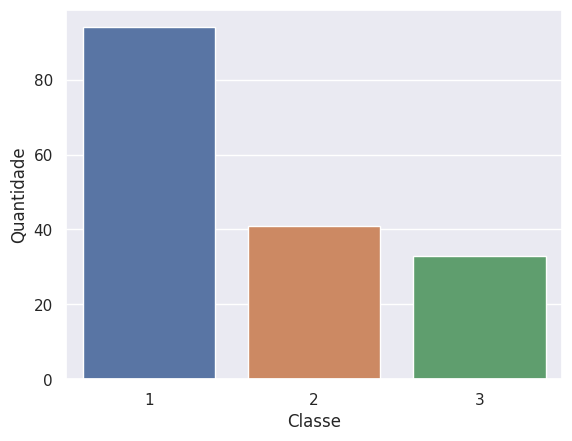

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
ax = sns.countplot(data=df, x='rotulo')
ax.set_ylabel("Quantidade")
ax.set_xlabel("Classe")

plt.show()

- Gerando um gráfico de *Pizza*

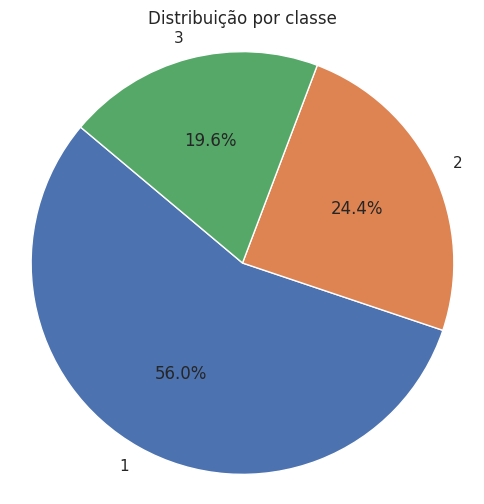

In [ ]:
# Calcular a contagem de cada tipo
contagem_tipos = df['rotulo'].value_counts()

sns.set(style="darkgrid")
plt.figure(figsize=(6, 6))
plt.pie(contagem_tipos, labels=contagem_tipos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição por classe')
plt.axis('equal')  # Isso garante que o gráfico seja circular
plt.show()

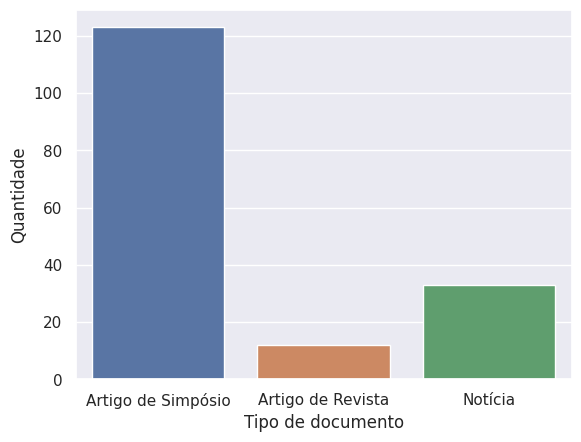

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(data=df, x='tipo_documento')
ax.set_ylabel("Quantidade")
ax.set_xlabel("Tipo de documento")

plt.show()

- Gerando um gráfico de *Pizza*

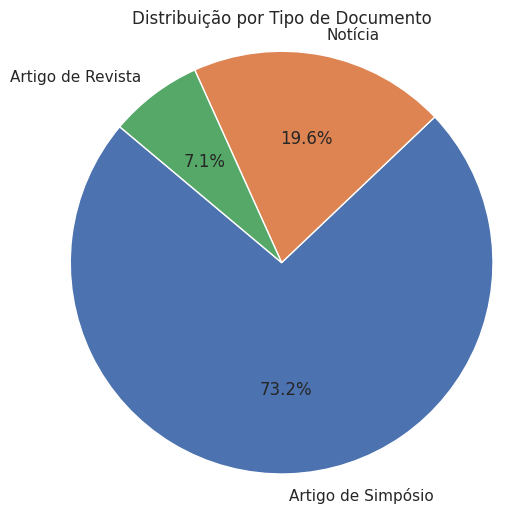

In [ ]:
# Calcular a contagem de cada tipo
contagem_tipos = df['tipo_documento'].value_counts()

sns.set(style="darkgrid")
plt.figure(figsize=(6, 6))
plt.pie(contagem_tipos, labels=contagem_tipos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição por Tipo de Documento')
plt.axis('equal')  # Isso garante que o gráfico seja circular
plt.show()

## Alterando resumo

In [ ]:
df.head(2)

,id,titulo,autor,url,tipo_documento,rotulo,resumo,texto
0,88,estudo dos efeitos de dircm em mísseis infrave...,"caio augusto de melo silvestre, lester de abre...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O crescente emprego de mísseis de ombro infrav...,"Mísseis Infravermelhos, especialmente os do t..."
1,125,caracterização de capacitores cerâmicos na fai...,"silva neto, l. p., rossi, j. o., barroso j. j.",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,2,Materiais dielétricos com baixas perdas e alta...,I. INTRODUÇÃO Cerâmicas dielétricas encontram ...


- Para os documentos sem resumo, iremos assumnir que `resumo = texto`

In [ ]:
# Função para contar caracteres e adicionar a nova coluna
def substituir_resumo_por_texto(df):
    for index, row in df.iterrows():
        if row['resumo'] == 0:
            df.at[index, 'resumo'] = row['texto']
    return df

In [ ]:
df = substituir_resumo_por_texto(df)

In [ ]:
df

,id,titulo,autor,url,tipo_documento,rotulo,resumo,texto
0,88,estudo dos efeitos de dircm em mísseis infrave...,"caio augusto de melo silvestre, lester de abre...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O crescente emprego de mísseis de ombro infrav...,"Mísseis Infravermelhos, especialmente os do t..."
1,125,caracterização de capacitores cerâmicos na fai...,"silva neto, l. p., rossi, j. o., barroso j. j.",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,2,Materiais dielétricos com baixas perdas e alta...,I. INTRODUÇÃO Cerâmicas dielétricas encontram ...
2,35,avaliação de algoritmos de machine learning na...,"fabiano g. da silva, lucas p. ramos, bruna g. ...",https://www.sige.ita.br/edicoes-anteriores/202...,Artigo de Simpósio,1,"Recentemente, a disponibilidade de dados públi...",I. INTRODUÇÃO As imagens orbitais têm sido uti...
3,147,avaliação de desempenho de redes tolerantes a ...,"davi marinho de a falcão, ronaldo moreira sall...",http://www.ebrevistas.eb.mil.br/CT/article/vie...,Artigo de Revista,1,Disruption-Tolerant Networks (DTN) são uma evo...,1. Introdução Otransporte marítimo é responsá...
4,104,uma arquitetura para radar secundário nos mod...,vitor augusto ferreira santa rita,https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,2,Neste artigo é apresentada uma arquitetura par...,I. INTRODUÇÃO Os modos de operação A e C para...
...,...,...,...,...,...,...,...,...
163,33,centro de avaliações do exército conclui teste...,Noticiário do Exército,https://www.eb.mil.br/web/noticias/noticiario-...,Notícia,3,Rio de Janeiro (RJ) – O Centro de Avaliações d...,Rio de Janeiro (RJ) – O Centro de Avaliações d...
164,139,sarp aplicado ao monitoramento de áreas com di...,"luis claudio batista da silva, ricardo maroqui...",http://www.ebrevistas.eb.mil.br/CT/article/vie...,Artigo de Revista,3,Este trabalho apresenta um sistema para contro...,1. Introdução Sistemas de aeronaves remotamen...
165,66,planejador de missões do rádio definido por so...,"Victor Feitosa de Carvalho Souza, Fillipe Mach...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,3,No contexto das comunicações táticas baseadas ...,I. INTRODUÇÃO O conceito de rádio definido po...
166,165,verificação de velocidade de alvos marítimos m...,"marcos roberto seixas, rafael lemos paes e dav...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O valor da velocidade de alvos móveis em image...,I. INTRODUÇÃO O sistema SAR é utilizado no mei...


# Contando palavras

### Quantidade de caracteres

In [ ]:
# Função para contar caracteres e adicionar a nova coluna
def contar_caracteres(texto):
    return len(texto)

In [ ]:
df['caracteres'] = df['texto'].apply(contar_caracteres)

### Quantidade de palavras

In [ ]:
# Função para contar palavras e adicionar a nova coluna
def contar_palavras(texto):
    palavras = texto.split()  # Divide o texto em palavras usando o carcter espaço
    return len(palavras)

In [ ]:
df['palavras'] = df['texto'].apply(contar_palavras)

In [ ]:
df

,id,titulo,autor,url,tipo_documento,rotulo,resumo,texto,caracteres,palavras
0,149,detecção de embarcações em imagens de sensores...,"nadjane c. de almeida, carlos frederico de sá ...",http://www.ebrevistas.eb.mil.br/CT/article/vie...,Artigo de Revista,1,Neste artigo é apresentado um método de detecç...,1. INTRODUÇÃO A extração de recursos provenie...,20039,3153
1,132,uma arquitetura de alta velocidade para siste...,"duarte l. oliveira, diego bompean, lester a. ...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,Projeto digital VLSI (Very Large Scale Integra...,I. INTRODUÇÃO Sistemas digitais contemporâne...,11471,1776
2,5,acessórios para morteiro são testados no centr...,Noticiário do Exército,https://www.eb.mil.br/web/noticias/noticiario-...,Notícia,2,Rio de Janeiro (RJ) – O Centro de Avaliações d...,Rio de Janeiro (RJ) – O Centro de Avaliações d...,1794,294
3,94,absorvedores de micro-ondas baseados em aditiv...,"simone s. pinto, newton a. s. gomes, mirabel c...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,Este trabalho tem como objetivo principal most...,I. INTRODUÇÃO Como consequência dos avanços t...,13028,2042
4,133,uma arquitetura para sistemas micropipeline de...,"duarte l. oliveira, kledermon garcia, roberto ...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O paradigma assíncrono possui características ...,I. INTRODUÇÃO Sistemas digitais embarcados req...,11583,1746
...,...,...,...,...,...,...,...,...,...,...
163,97,estudo para simulação da seção reta radar de a...,"ricardo e. g. da silva, newton a.s. gomes, mau...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,Os materiais absorvedores de radiação eletroma...,I. INTRODUÇÃO Materiais absorvedores de radiaç...,11885,1842
164,23,exército e embraer apresentam radar desenvolvi...,Noticiário do Exército,https://www.eb.mil.br/web/noticias/noticiario-...,Notícia,3,Campinas (SP) – Um dia histórico para o desenv...,Campinas (SP) – Um dia histórico para o desenv...,2869,454
165,95,análise comparativa das técnicas de geração fo...,"rodrigo de faria baroni, joaquim j. barroso, j...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,A geração fotônica de sinais para aplicação em...,I. INTRODUÇÃO A geração de sinais de radiofre...,22463,3590
166,183,rastreamento de veículos com emprego de sensor...,danilo habermann e claudio garcia,https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,2,Este artigo apresenta um sistema de rastreamen...,I. INTRODUÇÃO Desde 2002 a agência americana ...,18178,3064


### Métricas do Texto

- Caracteres:

In [ ]:
media = df['caracteres'].mean()
mediana = df['caracteres'].median()
quartis = df['caracteres'].quantile([0.25, 0.5, 0.75])
minimo = df['caracteres'].min()
maximo = df['caracteres'].max()

print("------ Caracteres------")
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Quartil 25%: {quartis[0.25]}')
print(f'Quartil 50% (Mediana): {quartis[0.5]}')
print(f'Quartil 75%: {quartis[0.75]}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')

------ Caracteres------
Média: 13798.815476190477
Mediana: 14641.0
Quartil 25%: 9681.0
Quartil 50% (Mediana): 14641.0
Quartil 75%: 18077.25
Mínimo: 1055
Máximo: 42606


- Palavras

In [ ]:
media = df['palavras'].mean()
mediana = df['palavras'].median()
quartis = df['palavras'].quantile([0.25, 0.5, 0.75])
minimo = df['palavras'].min()
maximo = df['palavras'].max()

print("------ Palavras------")
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Quartil 25%: {quartis[0.25]}')
print(f'Quartil 50% (Mediana): {quartis[0.5]}')
print(f'Quartil 75%: {quartis[0.75]}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')

------ Palavras------
Média: 2214.0773809523807
Mediana: 2399.0
Quartil 25%: 1537.5
Quartil 50% (Mediana): 2399.0
Quartil 75%: 2970.25
Mínimo: 171
Máximo: 6778


#### Métricas por tipo

In [ ]:
estatisticas_por_tipop = df.groupby('tipo_documento')['palavras'].agg(['mean', 'median','min','max'])
estatisticas_por_tipop.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Métricas palavras por tipo ------")
print(estatisticas_por_tipop)

------ Métricas palavras por tipo ------
                          media  mediana  minimo  maximo
tipo_documento                                          
Artigo de Revista   3938.000000   3976.0    1281    6778
Artigo de Simpósio  2559.951220   2504.0     826    4946
Notícia              298.030303    252.0     171     723


In [ ]:
estatisticas_por_tipoc = df.groupby('tipo_documento')['caracteres'].agg(['mean', 'median','min','max'])
estatisticas_por_tipoc.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Métricas caracteres por tipo ------")
print(estatisticas_por_tipoc)

------ Métricas caracteres por tipo ------
                           media  mediana  minimo  maximo
tipo_documento                                           
Artigo de Revista   24881.333333  25359.0    7692   42606
Artigo de Simpósio  15916.227642  15788.0    5386   31676
Notícia              1876.636364   1632.0    1055    4357


#### Métricas por rotulo

In [ ]:
estatisticas_por_rotulo = df.groupby('rotulo')['palavras'].agg(['mean', 'median','min','max'])
estatisticas_por_rotulo.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Métricas palavras por rótulo ------")
print(estatisticas_por_rotulo)

------ Métricas palavras por rótulo ------
              media  mediana  minimo  maximo
rotulo                                      
1       2538.074468   2528.0     826    4946
2       2658.365854   2463.0     183    6778
3        739.181818    268.0     171    4135


In [ ]:
estatisticas_por_rotulo = df.groupby('rotulo')['caracteres'].agg(['mean', 'median','min','max'])
estatisticas_por_rotulo.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Métricas caracteres por rótulo ------")
print(estatisticas_por_rotulo)

------ Métricas caracteres por rótulo ------
               media  mediana  minimo  maximo
rotulo                                       
1       15796.191489  15835.5    5386   31676
2       16564.317073  15073.0    1115   42606
3        4673.393939   1685.0    1055   26043


## Métricas do resumo

In [ ]:
df['r_caracteres'] = df['resumo'].apply(contar_caracteres)

In [ ]:
df['r_palavras'] = df['resumo'].apply(contar_palavras)

In [ ]:
media = df['r_caracteres'].mean()
mediana = df['r_caracteres'].median()
quartis = df['r_caracteres'].quantile([0.25, 0.5, 0.75])
minimo = df['r_caracteres'].min()
maximo = df['r_caracteres'].max()

print("------ Caracteres------")
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Quartil 25%: {quartis[0.25]}')
print(f'Quartil 50% (Mediana): {quartis[0.5]}')
print(f'Quartil 75%: {quartis[0.75]}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')

------ Caracteres------
Média: 1043.2380952380952
Mediana: 911.0
Quartil 25%: 733.75
Quartil 50% (Mediana): 911.0
Quartil 75%: 1131.5
Mínimo: 261
Máximo: 4357


In [ ]:
media = df['r_palavras'].mean()
mediana = df['r_palavras'].median()
quartis = df['r_palavras'].quantile([0.25, 0.5, 0.75])
minimo = df['r_palavras'].min()
maximo = df['r_palavras'].max()

print("------ Palavras------")
print(f'Média: {media}')
print(f'Mediana: {mediana}')
print(f'Quartil 25%: {quartis[0.25]}')
print(f'Quartil 50% (Mediana): {quartis[0.5]}')
print(f'Quartil 75%: {quartis[0.75]}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')

------ Palavras------
Média: 160.48214285714286
Mediana: 139.0
Quartil 25%: 111.0
Quartil 50% (Mediana): 139.0
Quartil 75%: 173.0
Mínimo: 40
Máximo: 723


In [ ]:
estatisticas_por_tipo2 = df.groupby('tipo_documento')['r_palavras'].agg(['mean', 'median','min','max'])
estatisticas_por_tipo2.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Resumo - Métricas palavras por tipo ------")
print(estatisticas_por_tipo2)

------ Resumo - Métricas palavras por tipo ------
                         media  mediana  minimo  maximo
tipo_documento                                         
Artigo de Revista   138.083333    137.0      62     197
Artigo de Simpósio  125.764228    130.0      40     202
Notícia             298.030303    252.0     171     723


In [ ]:
estatisticas_por_rotulo2 = df.groupby('rotulo')['r_palavras'].agg(['mean', 'median','min','max'])
estatisticas_por_rotulo2.columns = ['media', 'mediana', 'minimo','maximo']
print("------ Resumo - Métricas caracteres por rótulo ------")
print(estatisticas_por_rotulo2)

------ Resumo - Métricas caracteres por rótulo ------
             media  mediana  minimo  maximo
rotulo                                     
1       125.223404    128.5      57     197
2       161.317073    143.0      40     454
3       259.878788    238.0      97     723


## Análise de tokens

In [ ]:
!pip install -qq transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 19.3 MB/s eta 0:00:00


In [ ]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

- BERTIMBAU

In [ ]:
PRE_TRAINED_MODEL_NAME = 'neuralmind/bert-base-portuguese-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
token_lens = []
token_lens2 = []

# Texto e resumo
for txt in df.texto:
  tokens = tokenizer.encode(txt, max_length=9000)
  token_lens.append(len(tokens))

for txt in df.resumo:
  tokens2 = tokenizer.encode(txt, max_length=9000)
  token_lens2.append(len(tokens2))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

<ipython-input-45-77a1badfaa6d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


Text(0.5, 1.0, 'Tokens - Texto')

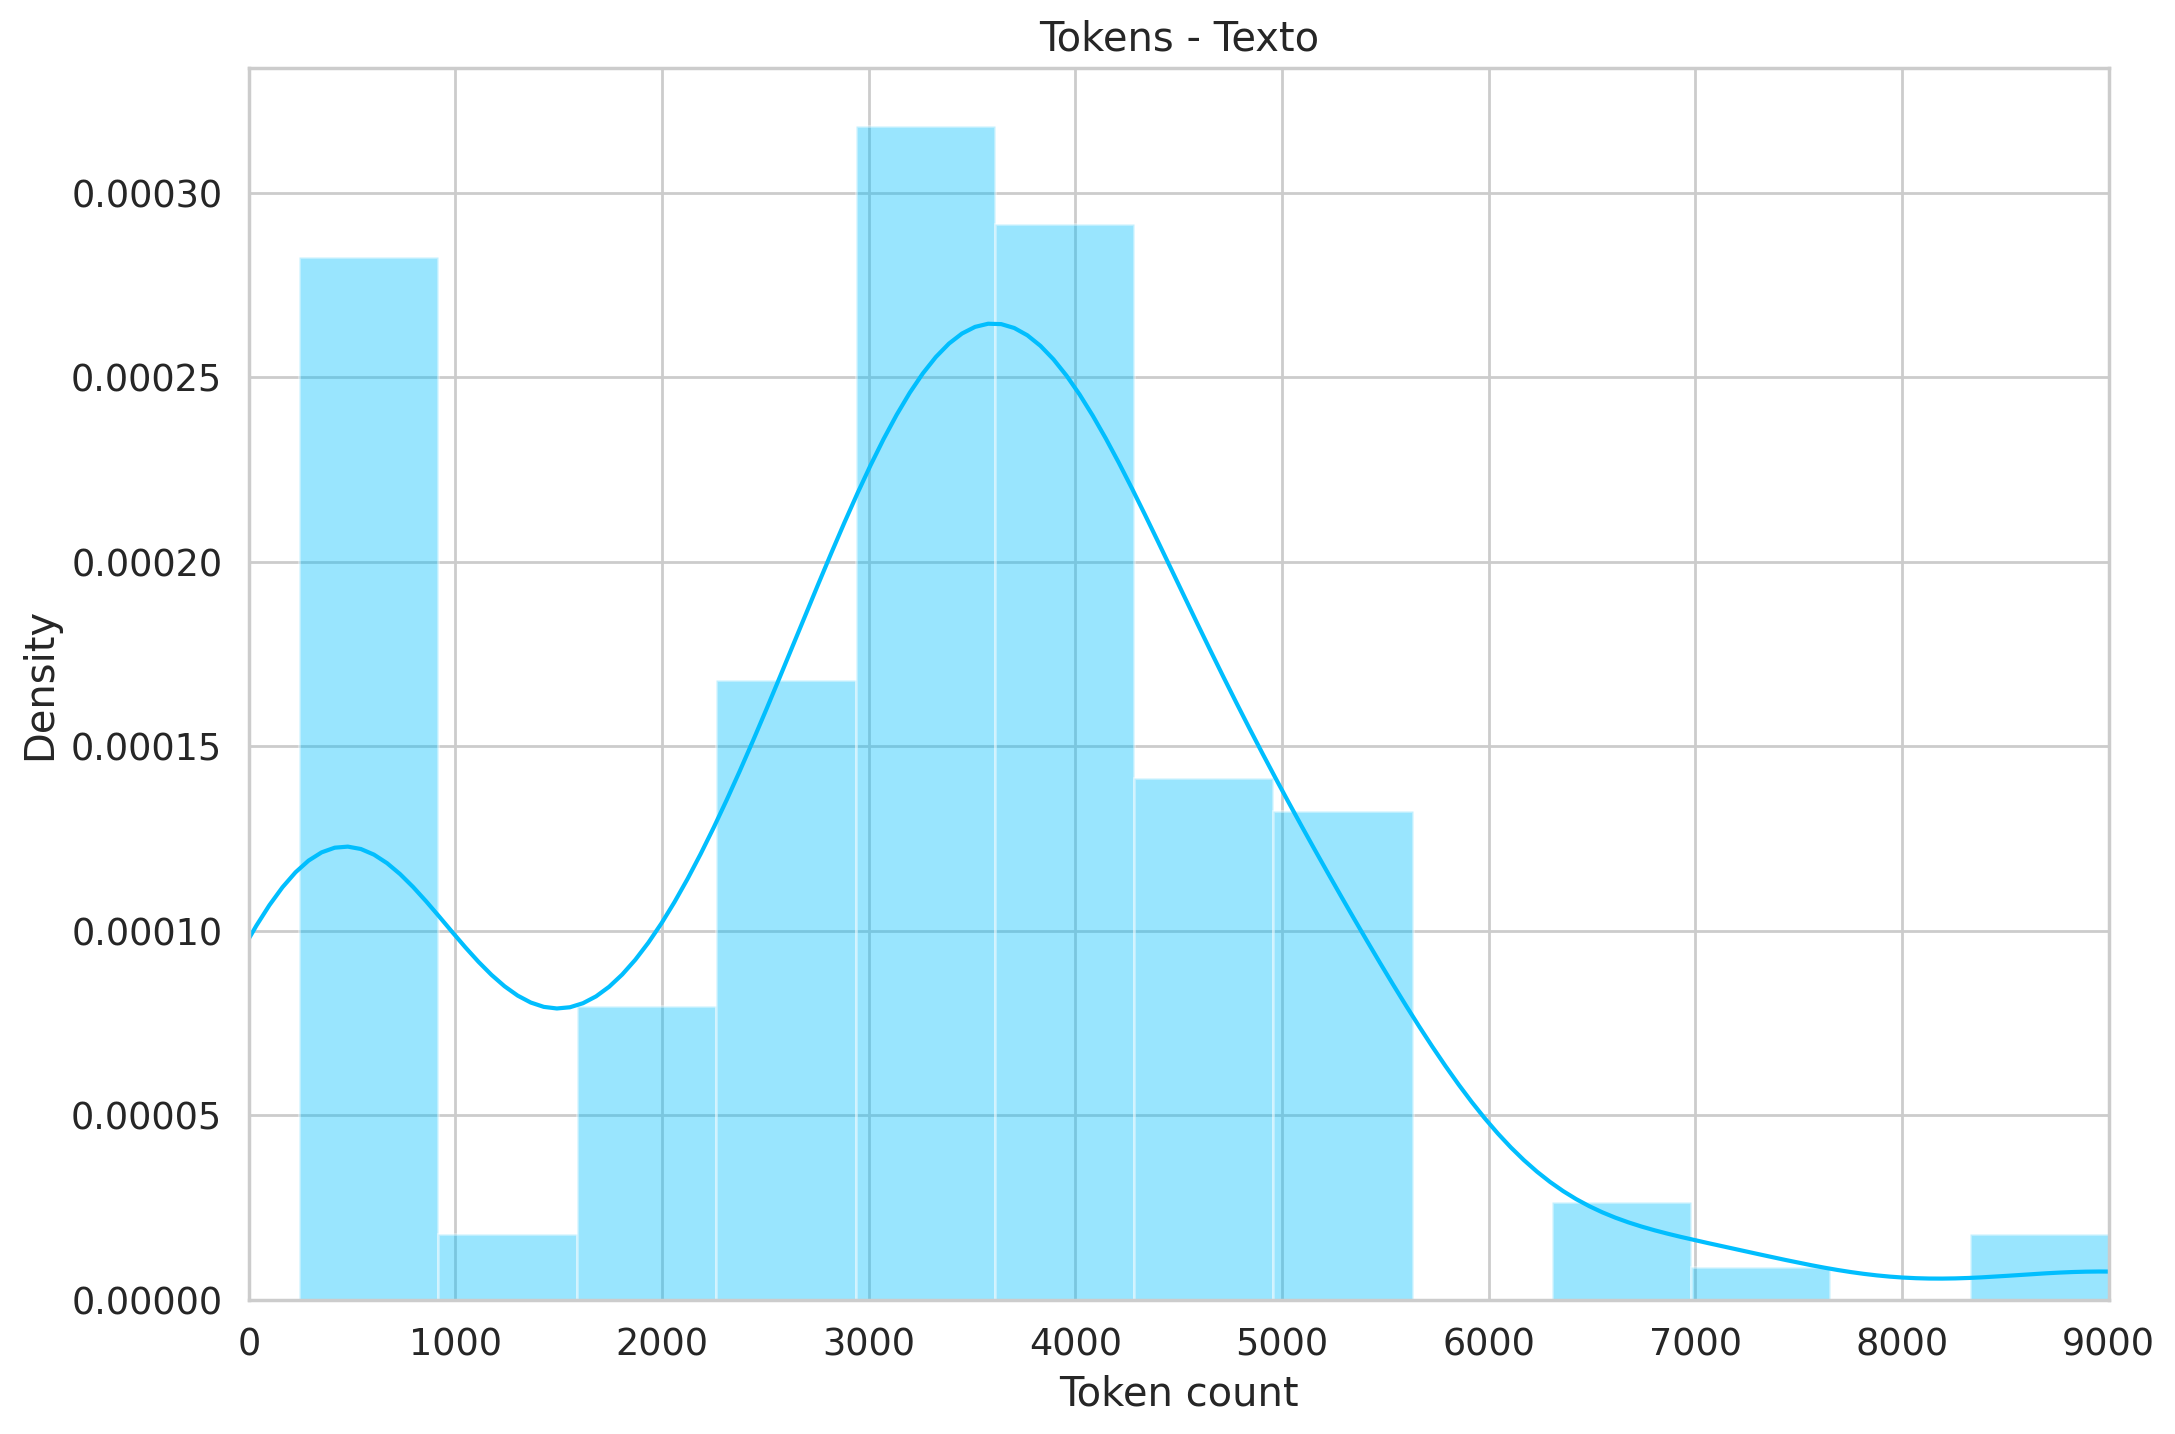

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 9000])
plt.xlabel('Token count')
plt.title("Tokens - Texto")

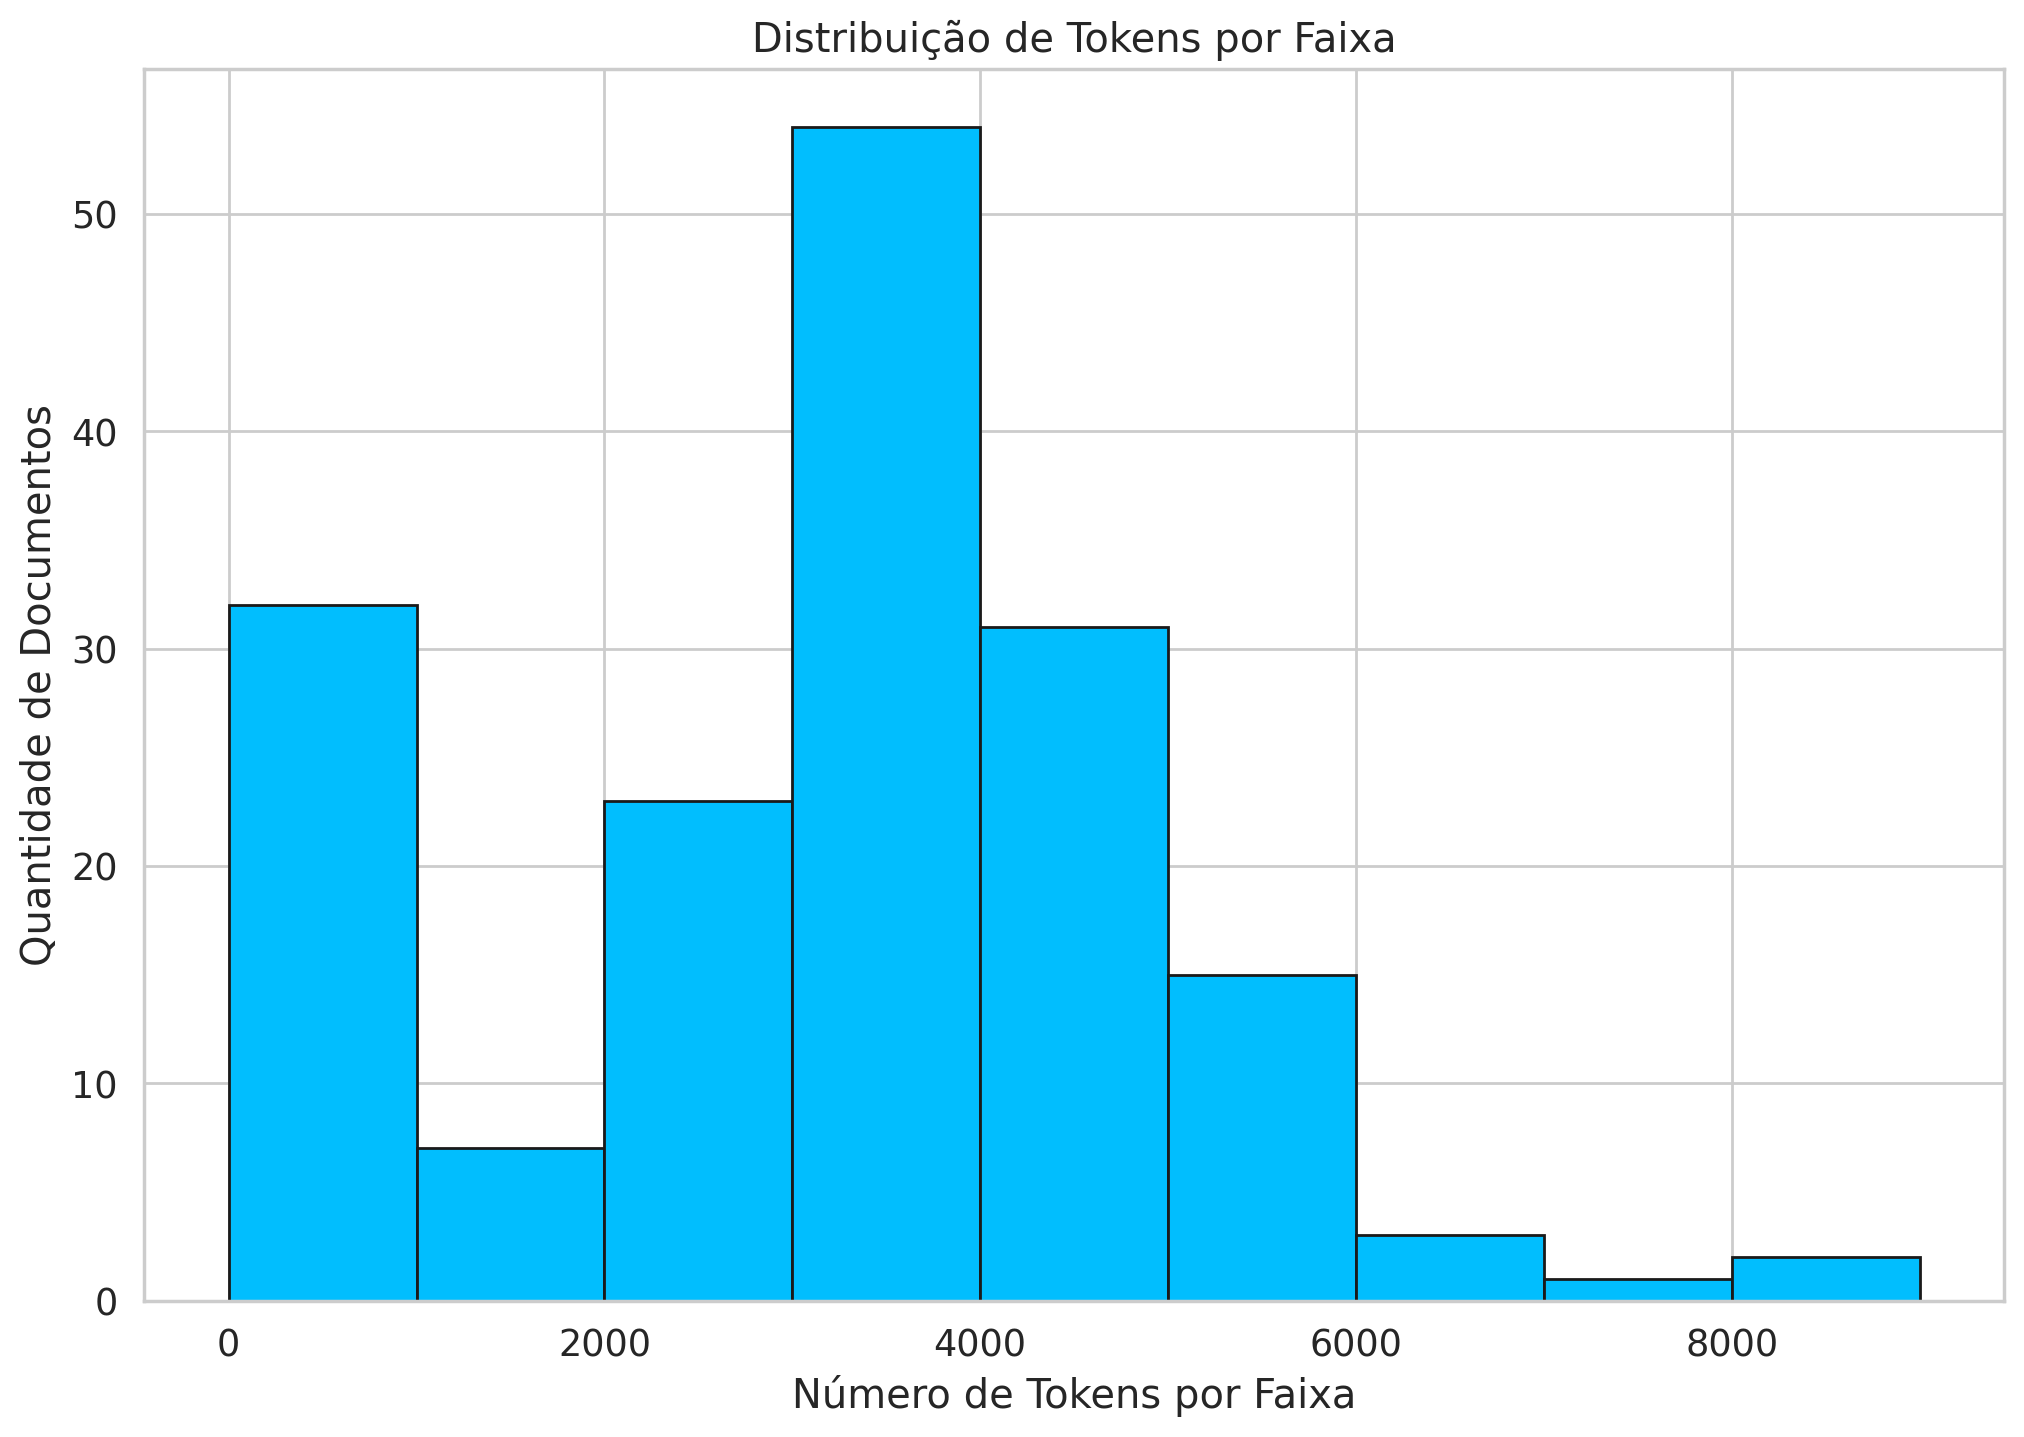

In [ ]:
# type(token_lens)
# Defina os limites das faixas (bins) desejados
bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000]

# Crie o histograma
plt.hist(token_lens, bins=bins, edgecolor='k')

# Configure os rótulos do eixo x e y
plt.xlabel('Número de Tokens por Faixa')
plt.ylabel('Quantidade de Documentos')

# Configure o título do gráfico
plt.title('Distribuição de Tokens por Faixa')

# Exiba o gráfico
plt.show()

<ipython-input-47-7e271e8096a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens2)


Text(0.5, 1.0, 'Tokens - Resumo')

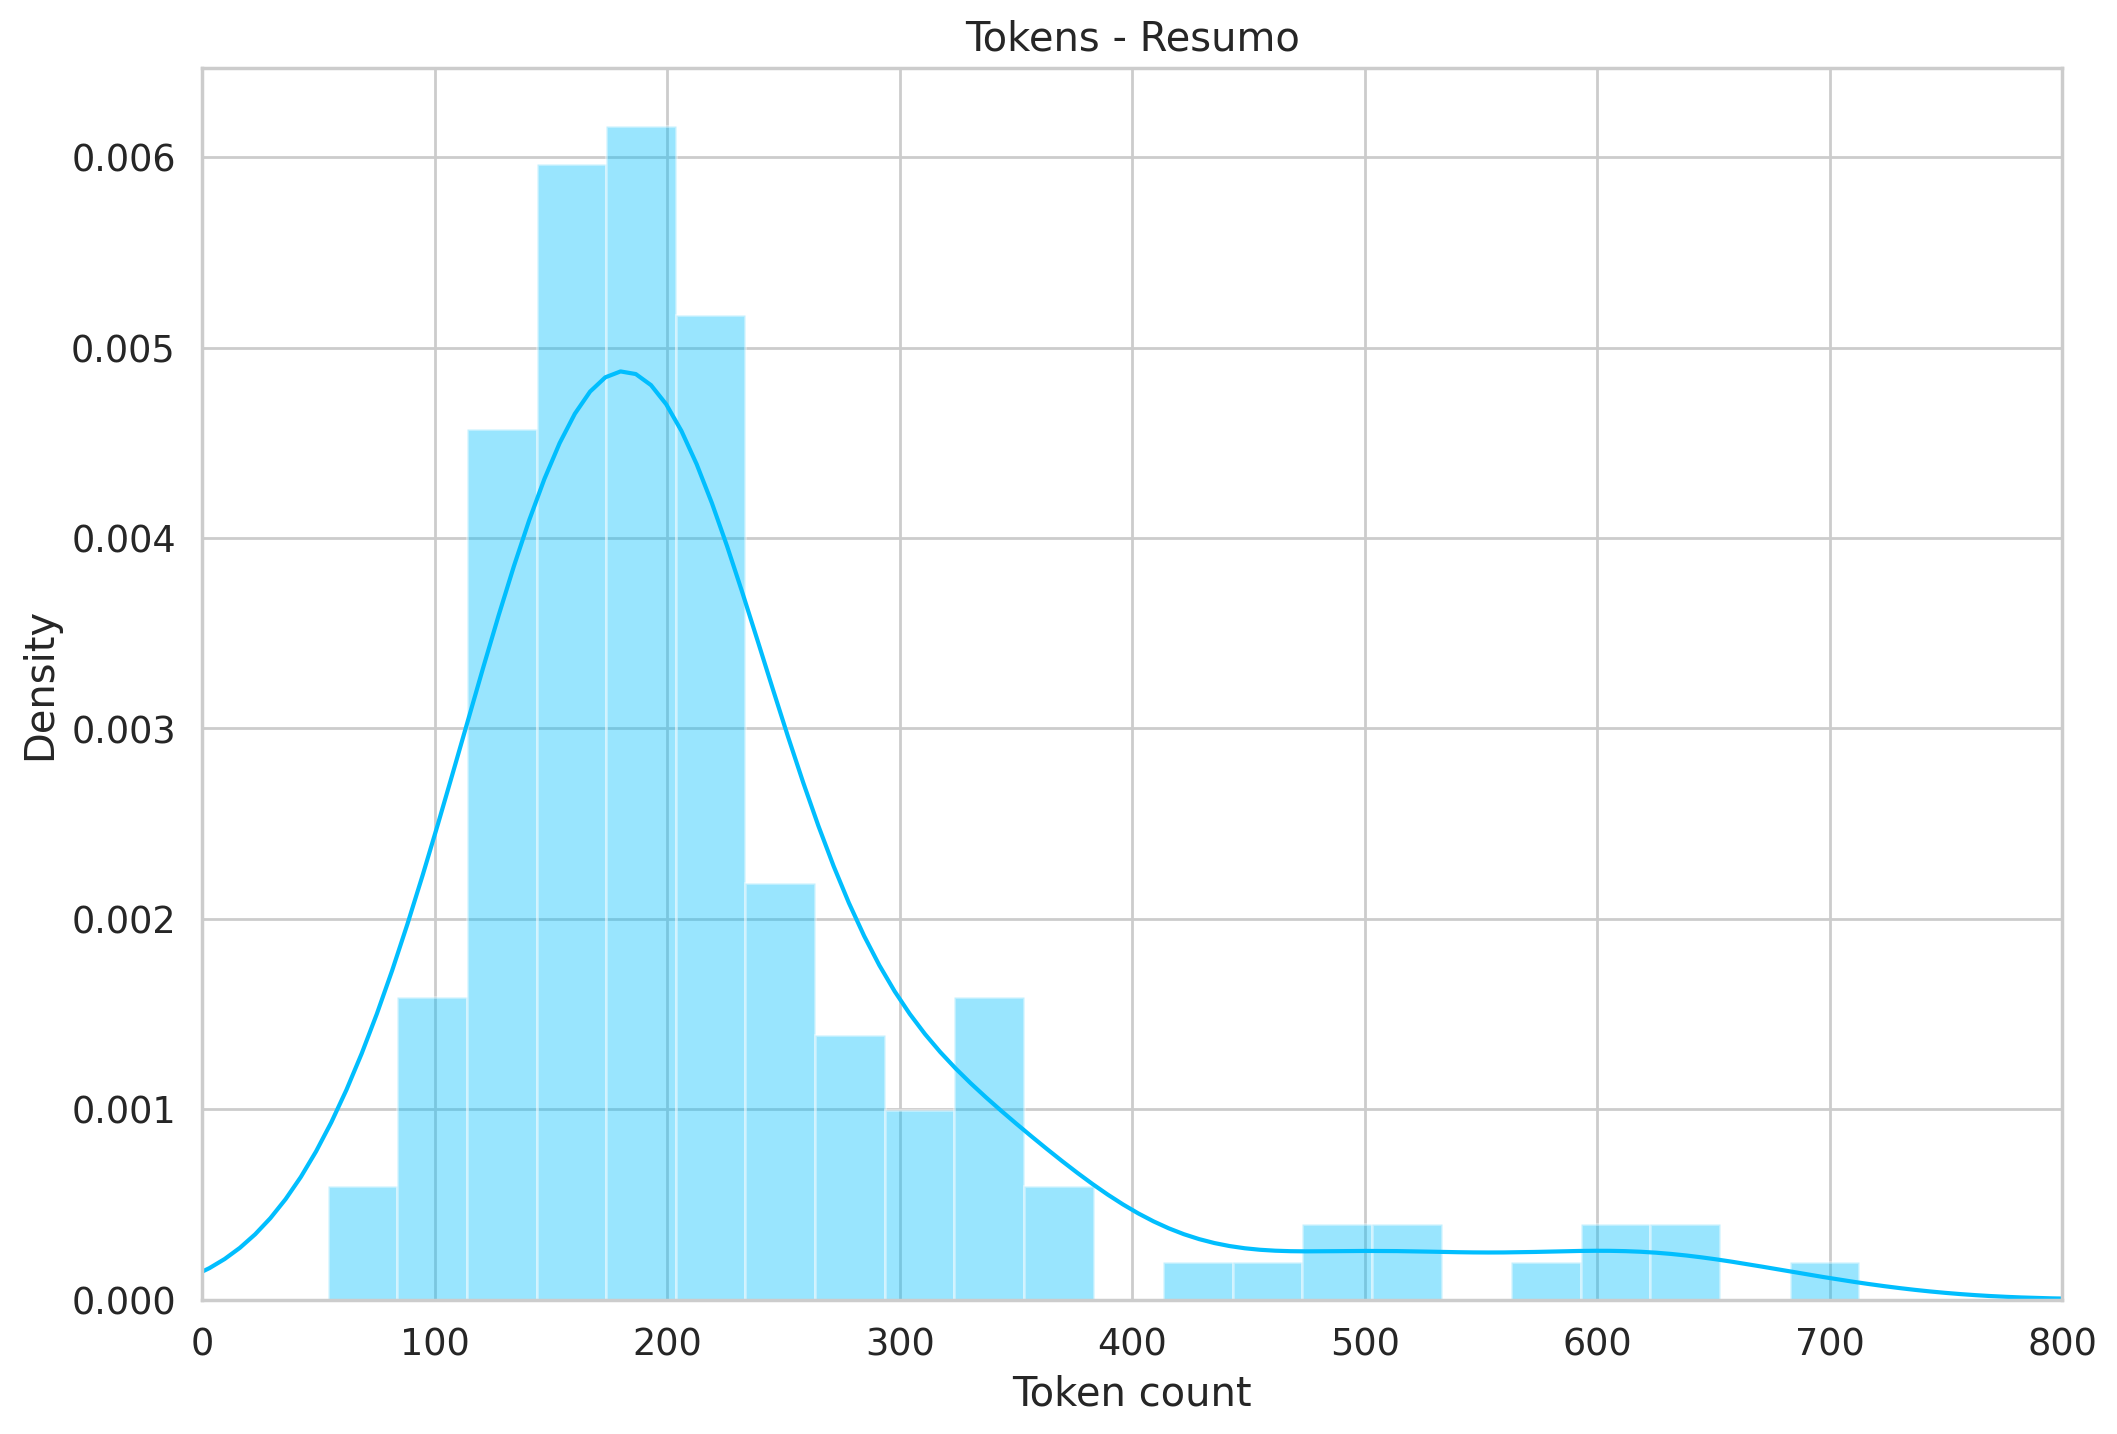

In [ ]:
sns.distplot(token_lens2)
plt.xlim([0, 800])
plt.xlabel('Token count')
plt.title("Tokens - Resumo")

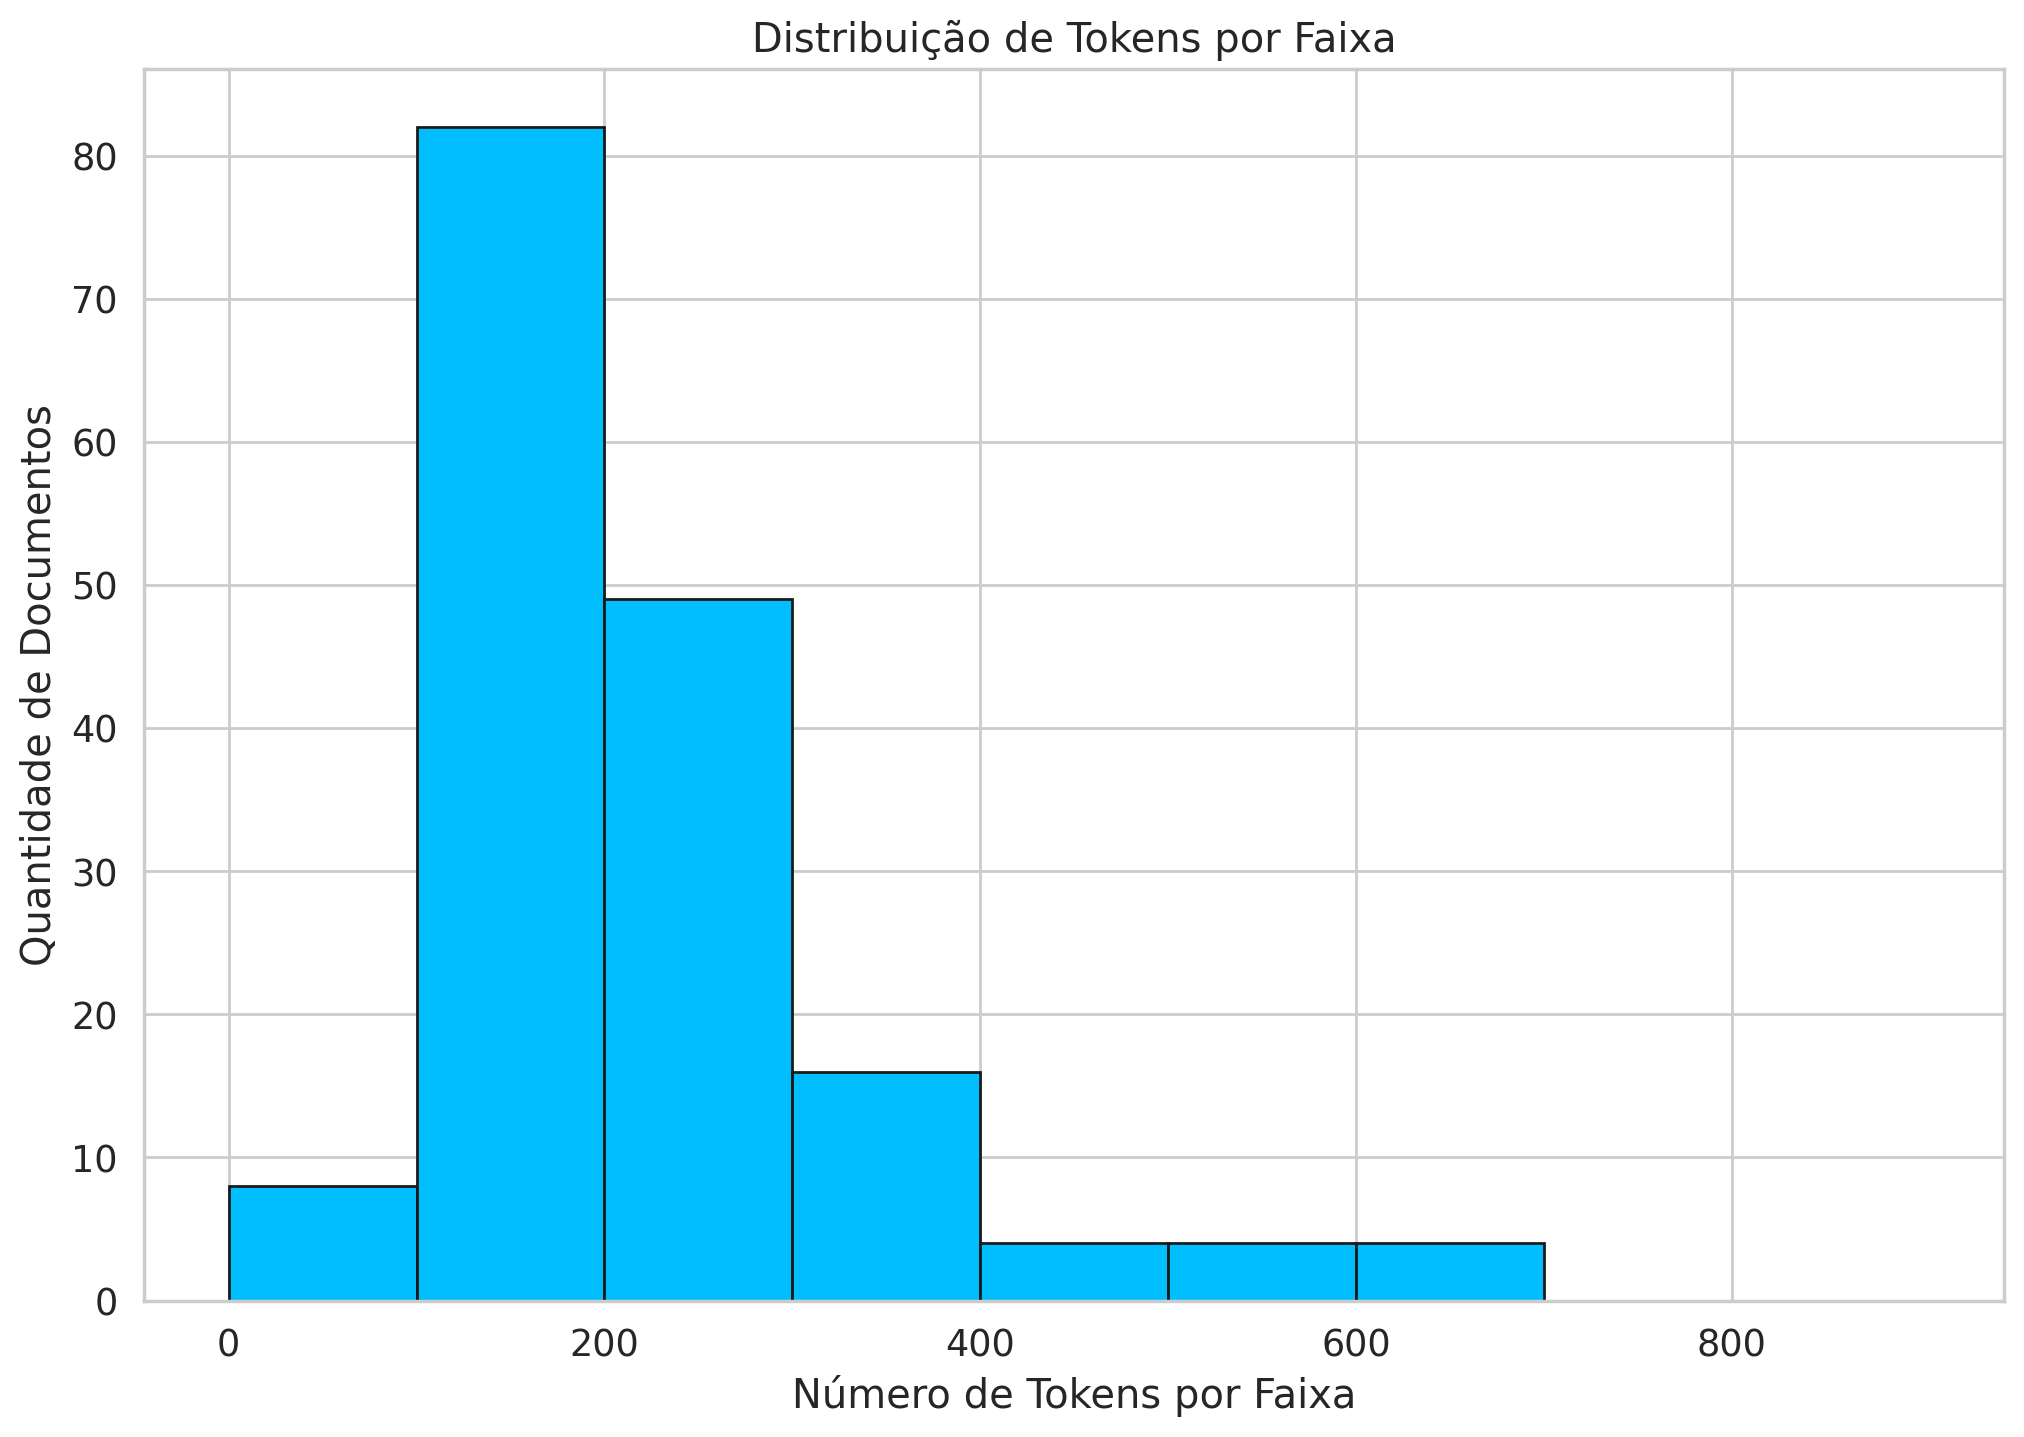

In [ ]:
# type(token_lens)
# Defina os limites das faixas (bins) desejados
bins = [0,100,200,300,400,500,600,700,800,900]

# Crie o histograma
plt.hist(token_lens2, bins=bins, edgecolor='k')

# Configure os rótulos do eixo x e y
plt.xlabel('Número de Tokens por Faixa')
plt.ylabel('Quantidade de Documentos')

# Configure o título do gráfico
plt.title('Distribuição de Tokens por Faixa')

# Exiba o gráfico
plt.show()

In [ ]:
df_token = pd.DataFrame(token_lens, columns=["token texto"])
summary = df_token["token texto"].describe()
summary

count     168.000000
mean     3183.226190
std      1776.591504
min       242.000000
25%      2215.750000
50%      3443.000000
75%      4204.750000
max      9000.000000
Name: token texto, dtype: float64

In [ ]:
df_token2 = pd.DataFrame(token_lens2, columns=["token resumo"])
summary = df_token2["token resumo"].describe()
summary

count     168.000000
mean      226.773810
std       132.437702
min        54.000000
25%       157.750000
50%       195.000000
75%       241.250000
max      1072.000000
Name: token resumo, dtype: float64

# Salvando como CSV

In [ ]:
colunas_para_remover = ['caracteres', 'palavras', 'r_caracteres', 'r_palavras']
df = df.drop(colunas_para_remover, axis=1)

In [ ]:
df

,id,titulo,autor,url,tipo_documento,rotulo,resumo,texto
0,88,estudo dos efeitos de dircm em mísseis infrave...,"caio augusto de melo silvestre, lester de abre...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O crescente emprego de mísseis de ombro infrav...,"Mísseis Infravermelhos, especialmente os do t..."
1,125,caracterização de capacitores cerâmicos na fai...,"silva neto, l. p., rossi, j. o., barroso j. j.",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,2,Materiais dielétricos com baixas perdas e alta...,I. INTRODUÇÃO Cerâmicas dielétricas encontram ...
2,35,avaliação de algoritmos de machine learning na...,"fabiano g. da silva, lucas p. ramos, bruna g. ...",https://www.sige.ita.br/edicoes-anteriores/202...,Artigo de Simpósio,1,"Recentemente, a disponibilidade de dados públi...",I. INTRODUÇÃO As imagens orbitais têm sido uti...
3,147,avaliação de desempenho de redes tolerantes a ...,"davi marinho de a falcão, ronaldo moreira sall...",http://www.ebrevistas.eb.mil.br/CT/article/vie...,Artigo de Revista,1,Disruption-Tolerant Networks (DTN) são uma evo...,1. Introdução Otransporte marítimo é responsá...
4,104,uma arquitetura para radar secundário nos mod...,vitor augusto ferreira santa rita,https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,2,Neste artigo é apresentada uma arquitetura par...,I. INTRODUÇÃO Os modos de operação A e C para...
...,...,...,...,...,...,...,...,...
163,33,centro de avaliações do exército conclui teste...,Noticiário do Exército,https://www.eb.mil.br/web/noticias/noticiario-...,Notícia,3,Rio de Janeiro (RJ) – O Centro de Avaliações d...,Rio de Janeiro (RJ) – O Centro de Avaliações d...
164,139,sarp aplicado ao monitoramento de áreas com di...,"luis claudio batista da silva, ricardo maroqui...",http://www.ebrevistas.eb.mil.br/CT/article/vie...,Artigo de Revista,3,Este trabalho apresenta um sistema para contro...,1. Introdução Sistemas de aeronaves remotamen...
165,66,planejador de missões do rádio definido por so...,"Victor Feitosa de Carvalho Souza, Fillipe Mach...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,3,No contexto das comunicações táticas baseadas ...,I. INTRODUÇÃO O conceito de rádio definido po...
166,165,verificação de velocidade de alvos marítimos m...,"marcos roberto seixas, rafael lemos paes e dav...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O valor da velocidade de alvos móveis em image...,I. INTRODUÇÃO O sistema SAR é utilizado no mei...


## Dataset sem manipulação

In [ ]:
# Exportando o DataFrame para um arquivo CSV
df.to_csv('dataset.csv', index=False)

- Importação alternativa:

In [98]:
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd
import numpy as np
# Pré-processamento
nltk.download('punkt')
nltk.download('rslp')
stemmer = RSLPStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [99]:
df = pd.read_csv("dataset.csv")
df.head(2)

,id,titulo,autor,url,tipo_documento,rotulo,resumo,texto
0,88,estudo dos efeitos de dircm em mísseis infrave...,"caio augusto de melo silvestre, lester de abre...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,O crescente emprego de mísseis de ombro infrav...,"Mísseis Infravermelhos, especialmente os do t..."
1,125,caracterização de capacitores cerâmicos na fai...,"silva neto, l. p., rossi, j. o., barroso j. j.",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,2,Materiais dielétricos com baixas perdas e alta...,I. INTRODUÇÃO Cerâmicas dielétricas encontram ...


## Dataset com pré-processamento: *dataset_pre_processado_1.csv*

- Remoção de números, minúscula, remoção de acentuação, remoção de tudo que não for caracter alfabetico ou "." ou ","...

In [100]:
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import string
# from unidecode import unidecode
import unicodedata

- Minúscula

In [101]:
df['texto'] = df['texto'].str.lower()
df['resumo'] = df['resumo'].str.lower()

- Número

In [102]:
df['texto'] = df['texto'].str.replace(r'\d', '', regex=True)
df['resumo'] = df['resumo'].str.replace(r'\d', '', regex=True)

- Acentuação

In [103]:
def remover_acentos(text):
    return ''.join(char for char in unicodedata.normalize('NFD', text) if not unicodedata.combining(char))

In [104]:
teste = "distância"
remover_acentos(teste)

'distancia'

In [105]:
df['texto'] = df['texto'].apply(remover_acentos)

In [106]:
df['resumo'] = df['resumo'].apply(remover_acentos)

- Ficando só com sinais de pontuação (. e ,) e caracteres alfabéticos:

Perceba que algumas operações anteriores, como remoção de números, foram desnecessárias, uma vez que já seriam executadas aqui.

In [107]:
df['texto'] = df['texto'].str.replace(r'[^a-zA-Z., ]', '', regex=True)
df['resumo'] = df['resumo'].str.replace(r'[^a-zA-Z., ]', '', regex=True)

In [108]:
# Exportando o DataFrame para um arquivo CSV
df.to_csv('dataset_pre_processado_1.csv', index=False)

In [109]:
df

,id,titulo,autor,url,tipo_documento,rotulo,resumo,texto
0,88,estudo dos efeitos de dircm em mísseis infrave...,"caio augusto de melo silvestre, lester de abre...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,o crescente emprego de misseis de ombro infrav...,"misseis infravermelhos, especialmente os do t..."
1,125,caracterização de capacitores cerâmicos na fai...,"silva neto, l. p., rossi, j. o., barroso j. j.",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,2,materiais dieletricos com baixas perdas e alta...,i. introducao ceramicas dieletricas encontram ...
2,35,avaliação de algoritmos de machine learning na...,"fabiano g. da silva, lucas p. ramos, bruna g. ...",https://www.sige.ita.br/edicoes-anteriores/202...,Artigo de Simpósio,1,"recentemente, a disponibilidade de dados publi...",i. introducao as imagens orbitais tem sido uti...
3,147,avaliação de desempenho de redes tolerantes a ...,"davi marinho de a falcão, ronaldo moreira sall...",http://www.ebrevistas.eb.mil.br/CT/article/vie...,Artigo de Revista,1,disruptiontolerant networks dtn sao uma evoluc...,. introducao otransporte maritimo e responsav...
4,104,uma arquitetura para radar secundário nos mod...,vitor augusto ferreira santa rita,https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,2,neste artigo e apresentada uma arquitetura par...,i. introducao os modos de operacao a e c para...
...,...,...,...,...,...,...,...,...
163,33,centro de avaliações do exército conclui teste...,Noticiário do Exército,https://www.eb.mil.br/web/noticias/noticiario-...,Notícia,3,rio de janeiro rj o centro de avaliacoes do e...,rio de janeiro rj o centro de avaliacoes do e...
164,139,sarp aplicado ao monitoramento de áreas com di...,"luis claudio batista da silva, ricardo maroqui...",http://www.ebrevistas.eb.mil.br/CT/article/vie...,Artigo de Revista,3,este trabalho apresenta um sistema para contro...,. introducao sistemas de aeronaves remotament...
165,66,planejador de missões do rádio definido por so...,"Victor Feitosa de Carvalho Souza, Fillipe Mach...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,3,no contexto das comunicacoes taticas baseadas ...,i. introducao o conceito de radio definido po...
166,165,verificação de velocidade de alvos marítimos m...,"marcos roberto seixas, rafael lemos paes e dav...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,o valor da velocidade de alvos moveis em image...,i. introducao o sistema sar e utilizado no mei...


## Dataset com pré-processamento: *dataset_pre_processado_2.csv*

- Tokenização e remoção de stop words

In [110]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [111]:
stop_words_sem_acentos = {remover_acentos(word) for word in stop_words}

In [112]:
stop_words_sem_acentos.add('figura')
stop_words_sem_acentos.add('fig')
stop_words_sem_acentos.add('um')
stop_words_sem_acentos.add('dois')
stop_words_sem_acentos.add('três')
stop_words_sem_acentos.add('i')
stop_words_sem_acentos.add('ii')
stop_words_sem_acentos.add('introducao')
stop_words_sem_acentos.add('conclusao')
stop_words_sem_acentos.add('desenvolvimento')
stop_words_sem_acentos.add('consideracoes')
stop_words_sem_acentos.add('vez')
stop_words_sem_acentos.add('sobre')
stop_words_sem_acentos.add('pode')
stop_words_sem_acentos.add('onde')
stop_words_sem_acentos.add('secao')
stop_words_sem_acentos.add('alem')
stop_words_sem_acentos.add('por')
stop_words_sem_acentos.add('atraves')
stop_words_sem_acentos.add('nesse')
stop_words_sem_acentos.add('neste')
stop_words_sem_acentos.add('naquele')
stop_words_sem_acentos.add('esse')
stop_words_sem_acentos.add('este')
stop_words_sem_acentos.add('aquele')
stop_words_sem_acentos.add('essa')
stop_words_sem_acentos.add('esta')
stop_words_sem_acentos.add('aquela')

In [113]:
def preprocess_text(text):
    # Tokenização das palavras
    words = word_tokenize(text, language='portuguese')
    # Remoção das stop words
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words_sem_acentos and word.isalpha()]
    return " ".join(filtered_words)

In [114]:
df['texto'] = df['texto'].apply(preprocess_text)
df['resumo'] = df['resumo'].apply(preprocess_text)

In [115]:
df

,id,titulo,autor,url,tipo_documento,rotulo,resumo,texto
0,88,estudo dos efeitos de dircm em mísseis infrave...,"caio augusto de melo silvestre, lester de abre...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,crescente emprego misseis ombro infravermelhos...,misseis infravermelhos especialmente tipo manp...
1,125,caracterização de capacitores cerâmicos na fai...,"silva neto, l. p., rossi, j. o., barroso j. j.",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,2,materiais dieletricos baixas perdas alta permi...,ceramicas dieletricas encontram importante apl...
2,35,avaliação de algoritmos de machine learning na...,"fabiano g. da silva, lucas p. ramos, bruna g. ...",https://www.sige.ita.br/edicoes-anteriores/202...,Artigo de Simpósio,1,recentemente disponibilidade dados publicos se...,imagens orbitais sido utilizadas sensoriamento...
3,147,avaliação de desempenho de redes tolerantes a ...,"davi marinho de a falcão, ronaldo moreira sall...",http://www.ebrevistas.eb.mil.br/CT/article/vie...,Artigo de Revista,1,disruptiontolerant networks dtn evolucao mobil...,otransporte maritimo responsavel comercio inte...
4,104,uma arquitetura para radar secundário nos mod...,vitor augusto ferreira santa rita,https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,2,artigo apresentada arquitetura radar secundari...,modos operacao c radares secundarios passar te...
...,...,...,...,...,...,...,...,...
163,33,centro de avaliações do exército conclui teste...,Noticiário do Exército,https://www.eb.mil.br/web/noticias/noticiario-...,Notícia,3,rio janeiro rj centro avaliacoes exercito caex...,rio janeiro rj centro avaliacoes exercito caex...
164,139,sarp aplicado ao monitoramento de áreas com di...,"luis claudio batista da silva, ricardo maroqui...",http://www.ebrevistas.eb.mil.br/CT/article/vie...,Artigo de Revista,3,trabalho apresenta sistema controle multiplas ...,sistemas aeronaves remotamente pilotadas sarp ...
165,66,planejador de missões do rádio definido por so...,"Victor Feitosa de Carvalho Souza, Fillipe Mach...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,3,contexto comunicacoes taticas baseadas uso rad...,conceito radio definido software rds cada pres...
166,165,verificação de velocidade de alvos marítimos m...,"marcos roberto seixas, rafael lemos paes e dav...",https://www.sige.ita.br/edicoes-anteriores/201...,Artigo de Simpósio,1,valor velocidade alvos moveis imagens obtidas ...,sistema sar utilizado meio militar atividades ...


In [116]:
# Exportando o DataFrame para um arquivo CSV
df.to_csv('dataset_pre_processado_2.csv', index=False)

# Outras análises do *corpus*

## Nuvem de palavras por faixa TRL

In [117]:
!pip install wordcloud

- Informações sobre a biblioteca WordCloud

cff-version: 1.2.0

authors:

- family-names: "Mueller"

  given-names: "Andreas C"

  orcid: "https://orcid.org/0000-0002-2349-9428"



title: "Wordcloud"

version: 1.9.1

date-released: 2023-4-27

url: "https://github.com/amueller/wordcloud"

### Nuvem para o texto

In [118]:
# Concatene todos os textos processados em um único texto
all_text = " ".join(df['texto'])
t_all_text = nltk.word_tokenize(all_text)
freq_all = FreqDist(t_all_text)
freq_all = freq_all.most_common(100)

In [119]:
primeiros_10_valores = freq_all[:10]
print(primeiros_10_valores)

[('sinal', 1059), ('sistema', 972), ('dados', 946), ('frequencia', 849), ('cada', 705), ('forma', 689), ('radar', 665), ('tempo', 657), ('sinais', 624), ('resultados', 606)]


In [120]:
dicionario_all = dict(freq_all)

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

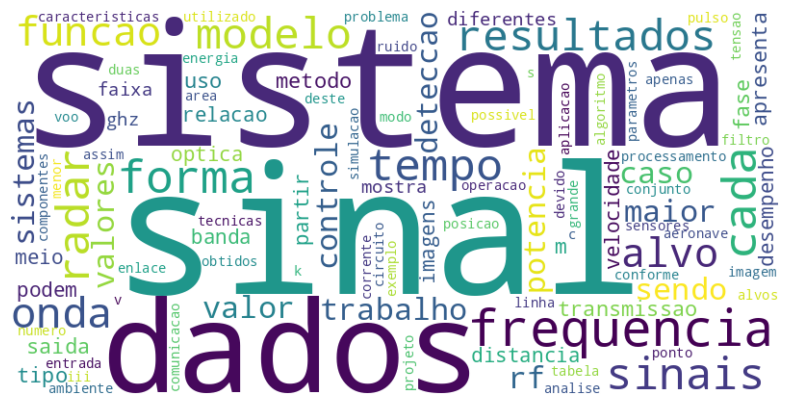

In [122]:
# Crie a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white',max_words=100)
wordcloud.generate_from_frequencies(dicionario_all)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud.to_file('nuvemTexto.png')

### Nuvem para o resumo

In [123]:
# Concatene todos os textos processados em um único texto
all_resumo = " ".join(df['resumo'])
t_all_resumo = nltk.word_tokenize(all_resumo)
freq_resumo = FreqDist(t_all_resumo)
freq_resumo = freq_resumo.most_common(100)

In [124]:
primeiros_10_valores = freq_resumo[:10]
print(primeiros_10_valores)

[('sistema', 149), ('exercito', 122), ('sistemas', 82), ('radar', 82), ('trabalho', 77), ('projeto', 68), ('tecnologia', 60), ('emprego', 57), ('artigo', 57), ('testes', 55)]


In [125]:
dicionario_resumo = dict(freq_resumo)

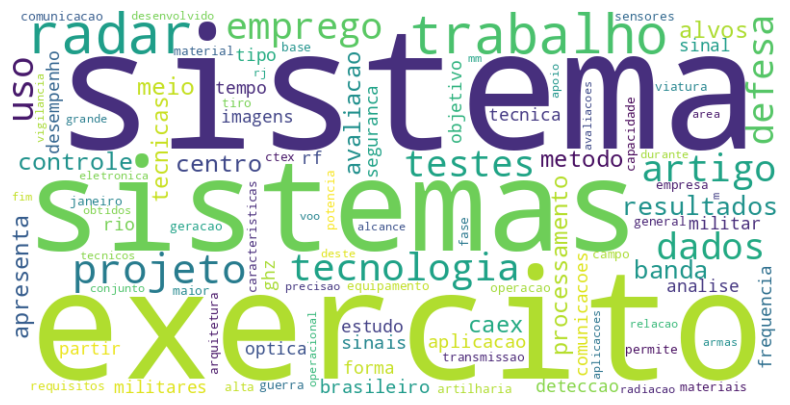

In [126]:
# Crie a nuvem de palavras
wordcloud2 = WordCloud(width=800, height=400, background_color='white')
wordcloud2.generate_from_frequencies(dicionario_resumo)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloud2.to_file('nuvemResumo.png')

### Nuvem de palavras por faixa:

In [127]:
linhas_fx_1 = df[df['rotulo'] == 1]
linhas_fx_2 = df[df['rotulo'] == 2]
linhas_fx_3 = df[df['rotulo'] == 3]

In [128]:
# Concatene todos os textos processados em um único texto
all_text_f1 = " ".join(linhas_fx_1['texto'])
all_text_f2 = " ".join(linhas_fx_2['texto'])
all_text_f3 = " ".join(linhas_fx_3['texto'])

In [129]:
t_all_text_1 = nltk.word_tokenize(all_text_f1)
freq_text1 = FreqDist(t_all_text_1)
freq_text1 = freq_text1.most_common(100)
primeiros_10_valores = freq_text1[:10]
print(primeiros_10_valores)
dicionario_text1 = dict(freq_text1)

[('sinal', 728), ('frequencia', 577), ('dados', 542), ('sistema', 540), ('forma', 454), ('radar', 443), ('tempo', 439), ('cada', 437), ('resultados', 430), ('modelo', 425)]


In [130]:
t_all_text_2 = nltk.word_tokenize(all_text_f2)
freq_text2 = FreqDist(t_all_text_2)
freq_text2 = freq_text2.most_common(100)
primeiros_10_valores = freq_text2[:10]
print(primeiros_10_valores)
dicionario_text2 = dict(freq_text2)

[('sinal', 307), ('dados', 291), ('sistema', 283), ('frequencia', 253), ('rf', 238), ('sinais', 234), ('cada', 234), ('forma', 195), ('transmissao', 190), ('tempo', 183)]


In [131]:
t_all_text_3 = nltk.word_tokenize(all_text_f3)
freq_text3 = FreqDist(t_all_text_3)
freq_text3 = freq_text3.most_common(100)
primeiros_10_valores = freq_text3[:10]
print(primeiros_10_valores)
dicionario_text3 = dict(freq_text3)

[('sistema', 149), ('dados', 113), ('exercito', 103), ('controle', 93), ('hf', 79), ('radio', 57), ('testes', 55), ('comunicacoes', 54), ('software', 52), ('defesa', 49)]


In [132]:
all_resumo_f1 = " ".join(linhas_fx_1['resumo'])
all_resumo_f2 = " ".join(linhas_fx_2['resumo'])
all_resumo_f3 = " ".join(linhas_fx_3['resumo'])

In [133]:
t_all_resumo1 = nltk.word_tokenize(all_resumo_f1)
freq_resumo1 = FreqDist(t_all_resumo1)
freq_resumo1 = freq_resumo1.most_common(100)
primeiros_10_valores = freq_resumo1[:10]
print(primeiros_10_valores)
dicionario_resumo1 = dict(freq_resumo1)

[('trabalho', 54), ('sistemas', 48), ('artigo', 37), ('resultados', 37), ('radar', 37), ('metodo', 36), ('banda', 35), ('uso', 29), ('imagens', 28), ('sistema', 27)]


In [134]:
t_all_resumo2 = nltk.word_tokenize(all_resumo_f2)
freq_resumo2 = FreqDist(t_all_resumo2)
freq_resumo2 = freq_resumo2.most_common(100)
primeiros_10_valores = freq_resumo2[:10]
print(primeiros_10_valores)
dicionario_resumo2 = dict(freq_resumo2)

[('sistema', 39), ('exercito', 24), ('radar', 23), ('projeto', 22), ('sinais', 19), ('trabalho', 18), ('sistemas', 18), ('artigo', 17), ('uso', 16), ('emprego', 15)]


In [135]:
t_all_resumo3 = nltk.word_tokenize(all_resumo_f3)
freq_resumo3 = FreqDist(t_all_resumo3)
freq_resumo3 = freq_resumo3.most_common(100)
primeiros_10_valores = freq_resumo3[:10]
print(primeiros_10_valores)
dicionario_resumo3 = dict(freq_resumo3)

[('exercito', 98), ('sistema', 83), ('testes', 40), ('tecnologia', 39), ('centro', 34), ('caex', 34), ('defesa', 32), ('brasileiro', 31), ('artilharia', 29), ('rio', 27)]


#### Nuvens do texto por faixa

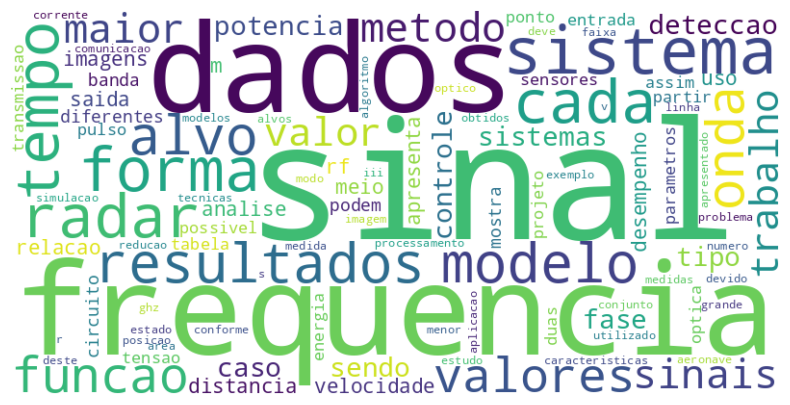

In [136]:
# Crie a nuvem de palavras
wordcloudt1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dicionario_text1)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudt1, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloudt1.to_file('nuvemTexo1.png')

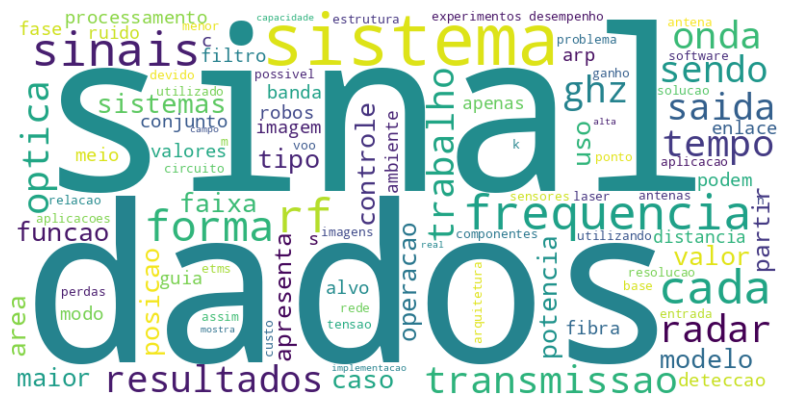

In [137]:
# Crie a nuvem de palavras
wordcloudt2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dicionario_text2)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudt2, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloudt2.to_file('nuvemTexo2.png')

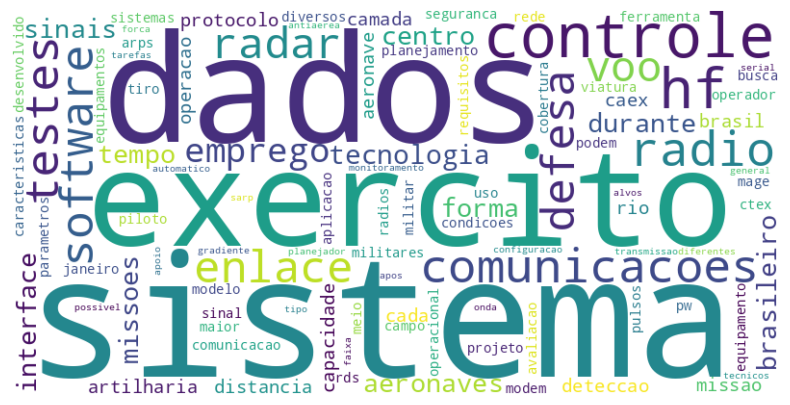

In [138]:
# Crie a nuvem de palavras
wordcloudt3 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dicionario_text3)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudt3, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloudt3.to_file('nuvemTexo3.png')

#### Nuvens do resumo por faixa

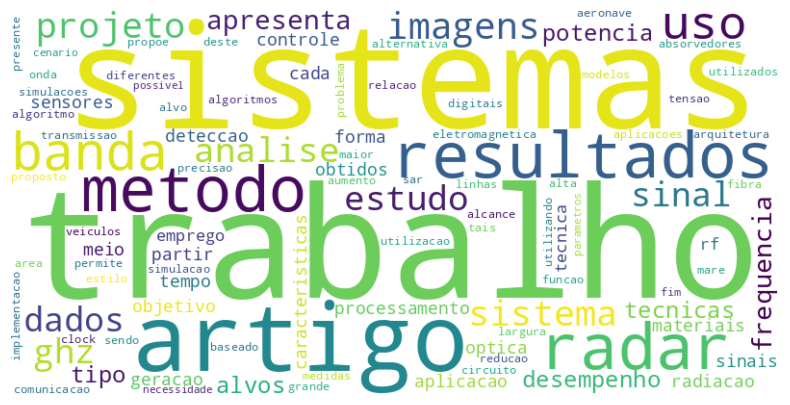

In [139]:
# Crie a nuvem de palavras
wordcloudr1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dicionario_resumo1)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudr1, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloudr1.to_file('nuvemResumo1.png')

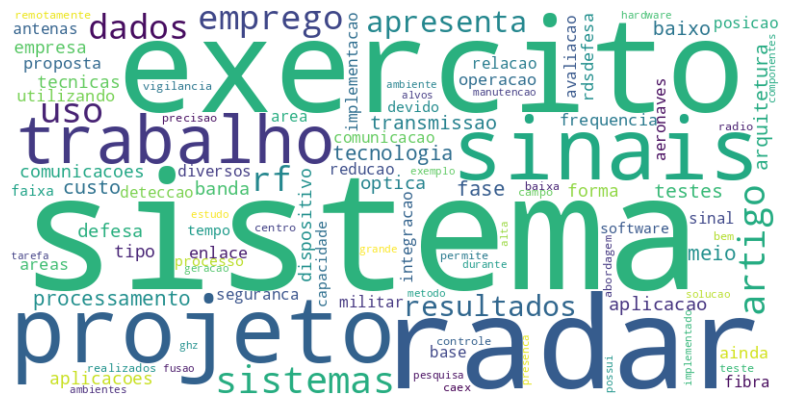

In [140]:
# Crie a nuvem de palavras
wordcloudr2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dicionario_resumo2)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudr2, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloudr2.to_file('nuvemResumo2.png')

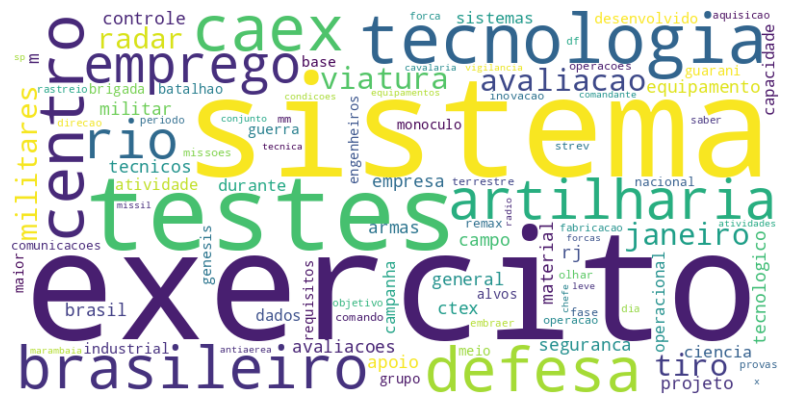

In [141]:
# Crie a nuvem de palavras
wordcloudr3 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dicionario_resumo3)
# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudr3, interpolation='bilinear')
plt.axis('off')
plt.show()
wordcloudr3.to_file('nuvemResumo3.png')